In [ ]:
import numpy as np
import os
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import mtcnn
from mtcnn import MTCNN
import matplotlib.patches as patches
import config as cg



In [ ]:
path = 'C:/Users/ArshiaAchar/Desktop/DS_projects/Step2/Pre_processing/scraped_images_b1'
final_folder = 'C:/Users/ArshiaAchar/Desktop/DS_projects/Step2/Pre_processing/processed_real_images_b1'  # Replace with your desired path
os.makedirs(final_folder,exist_ok=True)
files = os.listdir(path)

for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg'):  # Check for JPG files
        print(file)
        break

In [ ]:
file_path = os.path.join(path,file)

image = Image.open(file_path)
image.size

#### Face Detection on images

In [ ]:
# plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
image

In [ ]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(np.array(image))

fig,ax = plt.subplots()
ax.imshow(image)

# Draw bounding boxes on the images
for face in results:
    bounding_box = face['box']
    rect = patches.Rectangle((bounding_box[0], bounding_box[1]), bounding_box[2], bounding_box[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

### Extracting the detected face from the original image & resizing

In [ ]:
x, y, width, height = results[0]['box']
face_region = image.crop((x, y, x + width, y + height))

resize = 224
# Resize the face region to 224x224
resized_face = face_region.resize((resize, resize))
    

In [ ]:
resized_face

### Mean Subtraction

In [ ]:
cg.mean

In [120]:
resized_array = np.array(resized_face)
resized_array = resized_array[:,:,::-1] - cg.mean

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


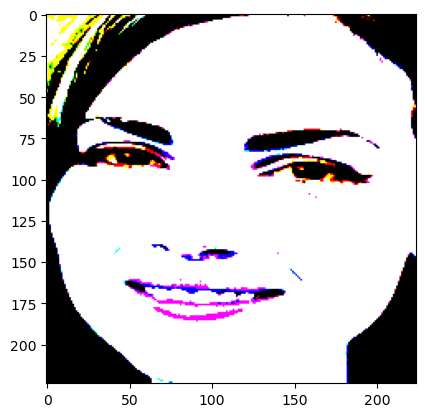

In [122]:
plt.imshow(resized_array)

### References

1. the main research paper
https://arxiv.org/pdf/1710.08092.pdf


2. Notebook reference for pre processing
https://github.com/WeidiXie/Keras-VGGFace2-ResNet50/blob/master/src/utils.py

In [84]:
# def load_data(path='', shape=None, mode='eval'):

#     short_size = 224.0
#     crop_size = shape
#     img = PIL.Image.open(path)
#     im_shape = np.array(img.size)    # in the format of (width, height, *)
#     img = img.convert('RGB')

#     ratio = float(short_size) / np.min(im_shape)
#     img = img.resize(size=(int(np.ceil(im_shape[0] * ratio)),   # width
#                            int(np.ceil(im_shape[1] * ratio))),  # height
#                      resample=PIL.Image.BILINEAR)

#     x = np.array(img)  # image has been transposed into (height, width)
#     newshape = x.shape[:2]
#     if mode == 'eval':    # center crop
#         h_start = (newshape[0] - crop_size[0])//2
#         w_start = (newshape[1] - crop_size[1])//2
#     else:
#         raise IOError('==> unknown mode.')
#     x = x[h_start:h_start+crop_size[0], w_start:w_start+crop_size[1]]
#     x = x[:, :, ::-1] - cg.mean
#     return x

### Saving preprocessed images

In [ ]:
# # Save or process the resized face
# resized_face_path = f'path/to/your/resized_face_{i}.jpg'
# resized_face.save(resized_face_path)
# print(f"Resized face saved to: {resized_face_path}")

#### Modularizing It

In [24]:
import matplotlib.pyplot as plt

In [161]:
import argparse
import numpy as np
from PIL import Image
import os
import config as cg

def preprocessing(image_path, output_size, save_dir = output_directory_path, mean_vals=cg.mean, scale_factor=1.0/255):
    """
    Resize the images, 
    perform mean subtraction, 
    scale the pixel values of an image, 
    and save the processed image to a specified directory.

    Args:
        image_path (str): Path to the image file in a certain directory.
        output_size (tuple): The target size (width, height) after resizing. Default (224,224)
        mean_vals (tuple, optional): Mean values for each channel to subtract (R, G, B).
        scale_factor (float, optional): Scale factor to apply after mean subtraction.
        save_dir (str, optional): Directory where the processed images will be saved.
    """
    # Load and resize the image
    image = Image.open(image_path)      
    image = image.resize(output_size)
    image_np = np.array(image, dtype=np.float32)

    # Check if image is grayscale and convert it to RGB by duplicating the channels
    if len(image_np.shape) == 2 or image_np.shape[2] == 1:
        image_np = np.stack((image_np,) * 3, axis=-1)

    # Perform mean subtraction
    for i in range(3):  # Assuming the image is in RGB format
        image_np[:, :, i] -= mean_vals[i]

    print(image_np[0][0])

    print(image_np[:,:,0][0][0])
    # Scale the pixel values
    image_np *= scale_factor
    print(image_np[0][0])

    # Convert back to PIL image for saving
    image_processed = Image.fromarray(np.uint8(image_np * 255))  # Rescale back to [0,255]

    # Ensure the save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save the processed image
    image_name = os.path.basename(image_path)
    save_path = os.path.join(save_dir, image_name)
    image_processed.save(save_path)

    print(f"Processed image saved to: {save_path}")





In [162]:

def reading_images(input_directory_path,output_size,output_directory_path):
    """
    Process all images within the specified directory.
    Reads each file or image from the input directory path and then creates the image path
    image path is the path of the directory + that of the image
    passes the image path with the output size for the resizing and the directory to save the preprocessed images
    """
    for filename in os.listdir(input_directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_directory_path, filename)

            preprocessing(image_path, output_size,save_dir = output_directory_path)
            break




In [163]:

if __name__ == "__main__":
    # parser = argparse.ArgumentParser(description="Preprocess images for modelling and then save in a separate folder.")
    # parser.add_argument("input_directory_path", type=str, help="Path to the directory containing images to be preprocessed.")
    # parser.add_argument("--width", type=int, default=224, help="Output image width.")
    # parser.add_argument("--height", type=int, default=224, help="Output image height.")
    # parser.add_argument("output_directory_path", type=str, help="Path to the directory to save preprocessed images.")

    # args = parser.parse_args()

    # # Convert command-line arguments for output size into a tuple
    # output_size = (args.width, args.height)

    # process all images in that directory
    # reading_images(args.input_directory_path)

    output_size = (224,224)
    output_directory_path = 'processed_real_images_temp'
    reading_images('scraped_images_b1',output_size,output_directory_path)


[-32.4953   -34.882698 -73.0912  ]
-32.4953
[-0.12743255 -0.13679491 -0.28663218]
Processed image saved to: processed_real_images_temp\24-01-2024-13-08-17-638657.jpg


In [133]:
-32.4953*(1/255)

-0.12743254901960785

In [109]:
59-91.4953

-32.4953